In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 15pt; line-height: 140%; font-weight: bold}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 15pt; line-height: 140%;}</style>"))


# 파일 이름에서 '학번'을 자신의 학번으로, '이름'을 자신의 이름으로 고치시오.

## 문제1

연속적으로 두번 중복된 문자 제거 문제

주어진 입력 s에 대하여, 연속적으로 같은 문자가 오는 경우에는 연속된 두 문자들을 문자열에서 제거하시오. 최종적으로 러턴할 문자열에는 연속된 문자들이 없어야 한다.

예) "abbac" 가 주어진 경우 "bb"가 연속된문자열이기 때문에 제거하면 "aac"가 된고, 다시 "aa"가 연속된 문자열이기 때문에 제거하여 최종적으로 "c" 문자열만 남게된다.

***결과***
```
ca
b
bc
```


In [51]:
# # 내 풀이
# def remove_dups(s):
#     stack = []
#     for i in s:
#         if not stack or i != stack[-1]:
#             stack.append(i)
# #             print('if', stack)
#         elif stack and i == stack.pop():
#             pass
#     return ''.join(stack)


# # 교수님 풀이
# def remove_dups(s):
#     # 스택에서 지금 이 순간에 중복이 제거된 문자열이 저장됨.
#     stack = []
#     for i in s:
#         if not stack or i != stack[-1]: # 중복이 안될 때만 넣는다.) stack이 비어있고, stack의 top이 i와 다를 때
#             stack.append(i)
#         elif stack and i == stack[-1]: # 중복인 경우) stack이 차 있고, stack의 top이 i와 같을 때
#             stack.pop()
#     return "".join(stack)


# # 교수님 풀이 깔끔버전
def remove_dups(s):
    # 스택에서 지금 이 순간에 중복이 제거된 문자열이 저장됨.
    stack = []
    for i in s:
        if stack and i == stack[-1]: # 중복인 경우) stack이 차 있고, stack의 top이 i와 같을 때
            stack.pop()
        else: # 중복이 안될 때만 넣는다.) stack이 비어있고, stack의 top이 i와 다를 때
            stack.append(i)
    return "".join(stack)
    pass

print(remove_dups("caaa"))
print(remove_dups("accab"))
print(remove_dups("baccaaac"))
   

ca
b
bc


## 문제2 - 보너스문제(최상급 난이도)

빗물 트래핑 문제

높이를 입력받아 비 온 후 얼마나 많은 물이 쌓일 수 있는지 계산하라.

스택을 사용하여 O(n)에 구현하시오.

- 입력 예
    - [0,1,0,2,1,0,1,3,2,1,2,1]
- 출력 예
    - 6
    
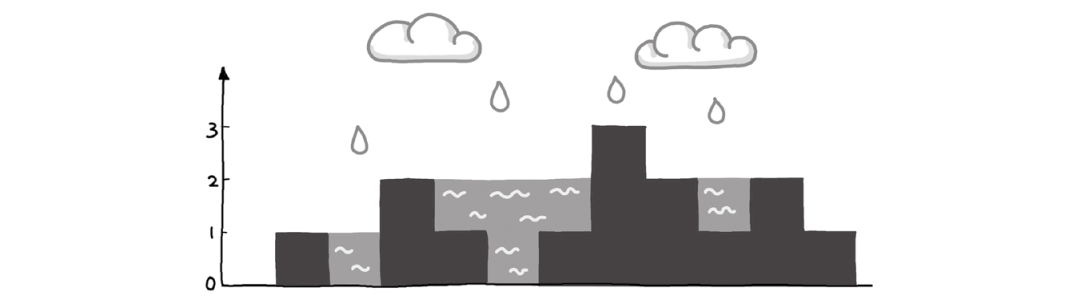

***결과***
```
6
11
```


In [52]:
# 웅덩이가 몇 칸인지
# 이해 못하는게 정상

def rain_trap(heights):
    stack = [] # 오른쪽 기둥 빼고 다 들어감 (block의 높이 저장)
    volume = 0 # 지금까지 구한 웅덩이의 너비
    
    for i in range(len(heights)): #입력받은 블럭의 높이, 왼쪽부터 쭉 스캔해 나감
        # i 단계에서 웅덩이 구할 수 있으면 구한다.
        
        while stack and heights[stack[-1]] < heights[i]: # 스택이 비어있지 않고, top (가장 최근에 들어온 블럭)의 높이가 현재 처리해야하는 블럭의 높이보다 낮으면!!!
            # 왜냐면 오른쪽이 더 높아야 물이 고이므로.
            
            # 고인물의 너비 계산
            
            # 이전에 저장했던 블럭 (cur) 꺼냄.
            cur = stack.pop() # 웅덩이 생겼는지 아닌지 조사하는 block

            
            # cur은 i보다 낮고, 그 왼쪽에 더 높은 기둥이 남아 있어야 물이 고임.
            ## 왼쪽 블럭이 없다면
            if not stack:
                break # 웅덩이가 안생긴다. 멈춰
            left = stack[-1]
            if heights[left] == heights[cur]:
                continue # 더 왼쪽에 또 다른 왼쪽 기둥이 있을 수 있으므로 continue....
                # 여기서 같지 않으면 (조건 만족 못하면) 왼쪽에 더 높은 기둥이 왔다는 뜻.
            
            ## 더 높은 기둥 찾음.
            right = i
            
            d = right - left - 1
            h = min (heights[left], heights[right]) - heights[cur]
            volume += d*h
        
        stack.append(i)
    return volume
    
    
# $$%#@#$%%^$#&$%*~!@##$%^&%$#@!~~#$%^^^ stack에서 기억하기!!!!!!!!!!! 조건에 맞으면 처리하고 아니면 stack에 넣기.


## 답
# def rain_trap(heights):
#     stack = []
#     volume = 0
    
#     for i in range(len(heights)):
#         while stack and heights[stack[-1]] < heights[i]:
#             cur = stack.pop()
#             if not stack:
#                 break
#             left = stack[-1]
#             if heights[left] == heights[cur]:
#                 continue
#             right = i
            
#             d = right - left - 1
#             h = min(heights[left], heights[right]) - heights[cur]
#             volume += d*h
#             #print(f"i:{i}, cur:{cur}, d:{d}, h:{h}")
        
#         stack.append(i)
        
#     return volume
    
# 아래는 수정하지 마시오.
print(rain_trap([0,1,0,2,1,0,1,3,2,1,2,1]))
print(rain_trap([0,4,0,0,1,0,3]))

    

6
11


## 문제3

프로그래머스 level2 프린터 문제

https://programmers.co.kr/learn/courses/30/lessons/42587

일반적인 프린터는 인쇄 요청이 들어온 순서대로 인쇄합니다. 그렇기 때문에 중요한 문서가 나중에 인쇄될 수 있습니다. 이런 문제를 보완하기 위해 중요도가 높은 문서를 먼저 인쇄하는 프린터를 개발했습니다. 이 새롭게 개발한 프린터는 아래와 같은 방식으로 인쇄 작업을 수행합니다.

1. 인쇄 대기목록의 가장 앞에 있는 문서(J)를 대기목록에서 꺼냅니다.
2. 나머지 인쇄 대기목록에서 J보다 중요도가 높은 문서가 한 개라도 존재하면 J를 대기목록의 가장 마지막에 넣습니다.
3. 그렇지 않으면 J를 인쇄합니다.

예를 들어, 4개의 문서(A, B, C, D)가 순서대로 인쇄 대기목록에 있고 중요도가 2 1 3 2 라면 C D A B 순으로 인쇄하게 됩니다.

내가 인쇄를 요청한 문서가 몇 번째로 인쇄되는지 알고 싶습니다. 위의 예에서 C는 1번째로, A는 3번째로 인쇄됩니다.

현재 대기목록에 있는 문서의 중요도가 순서대로 담긴 배열 priorities와 내가 인쇄를 요청한 문서가 현재 대기목록의 어떤 위치에 있는지를 알려주는 location이 매개변수로 주어질 때, 내가 인쇄를 요청한 문서가 몇 번째로 인쇄되는지 return 하도록 함수를 작성해주세요.

예시
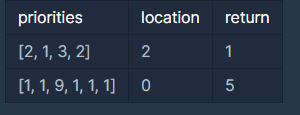

***결과***
```
1
4
2
5
```


In [55]:
# 큐
from collections import deque

def printer_order(priorities, location):
    # 중요도와 처음 위치 동시에 저장
    queue = deque([(i,p) for i,p in enumerate(priorities)])
    
    sorted_p = sorted(priorities) #[1,2,2,5,6]
    answer = 0 # 하나 출력될 때마다 +1

    while True:
        ## 큐에서 문서를 꺼내기
        i,p = queue.popleft() # i: 위치, p: 중요도
        
        if queue and p < sorted_p[-1]: ## 대기열에 더 높은 문서가 있다. (정렬했기 때문에 -1번째가 중요도 가장 큰 문서임.)
            queue.append((i,p)) # 출력 못하고 뒤로 미룸
            
        else:
            answer += 1 # 현재 몇 번 출력됐는지.
            sorted_p.pop() # 우선순위 가장 높은거 빠졌을 것.
            
            if i == location:
                return answer
    pass
    

print(printer_order([2, 1, 3, 2], 2))
print(printer_order([2, 1, 3, 2], 1))
print(printer_order([2, 1, 3, 2], 3))
print(printer_order([1, 1, 9, 1, 1, 1], 0))

            
# nlogn (sorted_p (정렬) 때문에)

1
4
2
5
